<a href="https://colab.research.google.com/github/MeanJun/MusicGenre/blob/main/Genre_classification_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn import neural_network
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/My Drive/Colab Notebooks')

df = pd.read_csv("ML_Project_Frequency_Distributions.csv")
print(df)


Mounted at /content/drive
                                      Title            0           200  \
0                       10-abbey_rhodes.mp3      1043621  6.174077e+07   
1          10-at_least_you've_been_told.mp3      2126883  1.391849e+08   
2    10-brilliant_day_(eine_kleine_mix).mp3      3638673  7.667548e+06   
3           10-carefully_watch_the_news.mp3      2498355  2.452500e+08   
4             10-echoes_of_the_big_bang.mp3  12633950144  2.344230e+07   
..                                      ...          ...           ...   
721              9-the_miller_(cittern).mp3        86584  3.665295e+05   
722                             9-tidur.mp3    769938087  1.017859e+06   
723                              9-tied.mp3     86919062  3.430673e+08   
724                           9-village.mp3     11548993  1.281289e+08   
725                        9-watergrave.mp3     54030186  3.200165e+07   

              400           600           800          1000          1200  \
0    2.0

In [77]:
#display(df['200'])
#display(df.iloc[1])

y = df['Genre']

Xi = []
for column_name in df.columns:
  if '0' in column_name:
    Xi.append(column_name)

X = df[Xi]
display(X)

,0,200,400,600,800,1000,1200,1400,1600,1800,...,18000,18200,18400,18600,18800,19000,19200,19400,19600,19800
0,1043621,6.174077e+07,2.047628e+08,3.878327e+08,4.376217e+07,4.884440e+06,1.731180e+07,6.923562e+06,1.728419e+06,1.097927e+07,...,2384.000186,2411.610402,1754.836694,1913.843566,2566.356447,1166.833088,753.321428,2477.249148,1230.352088,788.631319
1,2126883,1.391849e+08,8.998469e+07,1.171315e+08,7.954890e+07,3.387833e+07,3.675010e+07,4.422236e+07,1.228403e+07,9.543494e+06,...,24912.923230,19561.752830,49134.077460,23466.887240,6684.936444,83976.038140,5681.113413,16540.174520,26777.469810,39033.317830
2,3638673,7.667548e+06,1.335264e+07,1.898063e+07,2.204197e+07,5.892001e+06,9.928671e+05,2.514030e+06,2.312663e+07,2.726887e+06,...,1808.905693,1754.348879,2380.075771,2799.921865,2397.215117,3060.009491,2120.585649,2372.546729,2653.544784,1731.706378
3,2498355,2.452500e+08,6.596359e+07,9.187554e+07,5.290059e+07,2.163944e+07,5.459262e+07,2.057038e+07,1.404666e+07,6.839765e+06,...,8720.719579,7984.793342,9126.964638,4856.855111,7473.337512,9129.491911,6973.661419,8691.579700,8577.869889,8380.539834
4,12633950144,2.344230e+07,7.651874e+07,9.061877e+06,8.827554e+07,2.283532e+06,4.892226e+07,9.276679e+06,5.144914e+07,2.932875e+06,...,73223.639630,18513.552650,34590.849930,26508.658900,71477.055680,13465.560970,91316.783600,35046.101910,31169.952770,40243.379180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
721,86584,3.665295e+05,1.369037e+07,3.144619e+07,1.870274e+07,2.356730e+06,2.028713e+06,3.537294e+06,8.651003e+06,2.611717e+06,...,639.276869,283.928906,548.728504,800.541018,507.645049,682.111747,484.255361,576.954133,504.383435,331.504235
722,769938087,1.017859e+06,9.353992e+06,1.380481e+07,8.092018e+07,1.494883e+07,2.848125e+07,2.347014e+06,2.262380e+07,3.611236e+06,...,229.104270,341.207335,399.610729,893.044883,353.560577,1147.754123,1305.255075,925.147778,81.140008,400.980067
723,86919062,3.430673e+08,1.515665e+08,1.484745e+08,6.399268e+07,2.860090e+07,4.232596e+07,6.995141e+06,4.573241e+07,6.576561e+07,...,7954.553852,13794.083820,7399.559499,11459.391990,7525.632055,10353.106410,9651.288133,7398.833120,11956.698730,15839.580970
724,11548993,1.281289e+08,6.030640e+07,1.911551e+07,6.972920e+06,1.180302e+07,1.839644e+07,2.450797e+06,9.496889e+06,3.243097e+06,...,694.298070,1869.683255,1208.424440,1351.201590,584.805851,1441.999327,1022.987652,514.777775,637.927032,1623.243852


In [78]:
X.shape

(726, 100)

In [79]:
Xarray = X.values
Xarray.shape

(726, 100)

In [80]:
Xarray[0].max()

387832722.2

In [81]:
song_maxs = Xarray.max(axis=1).reshape(-1,1)

In [82]:
Xnorm = Xarray / song_maxs

In [83]:
np.allclose(Xnorm[1,:], Xarray[1,:]/Xarray[1].max())

True

In [84]:
Xnorm.shape

(726, 100)

In [85]:
y

0      jazz_blues
1        rock_pop
2      electronic
3        rock_pop
4      metal_punk
          ...    
721     classical
722         world
723      rock_pop
724         world
725    metal_punk
Name: Genre, Length: 726, dtype: object

In [86]:
codes, uniques = y.factorize()

In [87]:
ycodes = codes
uniques

Index(['jazz_blues', 'rock_pop', 'electronic', 'metal_punk', 'classical',
       'world'],
      dtype='object')

In [88]:
X_train, X_test, y_train, y_test = train_test_split(Xnorm, ycodes, stratify=ycodes, random_state=0) # stratify ensures an equal ratio of each target

In [89]:
clf = neural_network.MLPClassifier(hidden_layer_sizes=(2,2,2),max_iter=10000, random_state=42)
clf.fit(X_train,y_train)
print(clf.score(X_train,y_train))
display(clf.score(X_test, y_test))

0.4485294117647059


0.43956043956043955

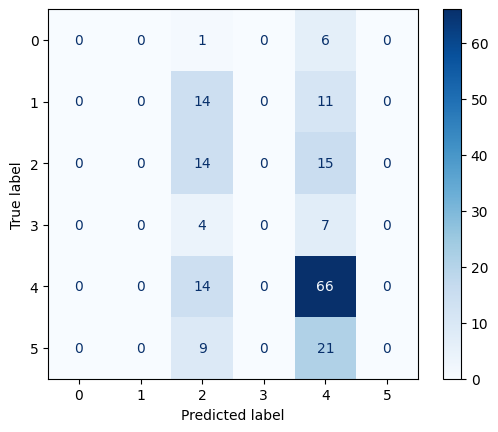

In [90]:
y_pred = clf.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.show()

In [91]:
priors_list = np.full(6, 1/6)
print(priors_list)

clf2 = GaussianNB(priors=priors_list)
clf2.fit(X_train,y_train)
display(clf2.score(X_train,y_train))
display(clf2.score(X_test,y_test))

[0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]


0.4007352941176471

0.35714285714285715

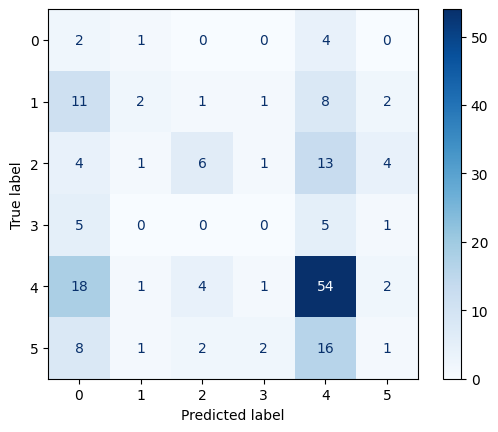

In [92]:
y_pred2 = clf2.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred2, cmap='Blues')
plt.show()

In [93]:
clf3 = LogisticRegressionCV(max_iter=10000)
clf3.fit(X_train,y_train)
display(clf3.score(X_train,y_train))
display(clf3.score(X_test,y_test))

0.45955882352941174

0.4340659340659341

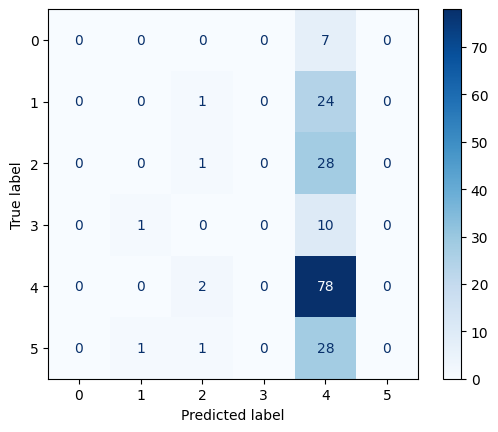

In [94]:
y_pred3 = clf3.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred3, cmap='Blues')
plt.show()

In [95]:
clf4 = LogisticRegressionCV(max_iter=10000,penalty='l1',solver='liblinear')
clf4.fit(X_train,y_train)
display(clf4.score(X_train,y_train))
display(clf4.score(X_test,y_test))

0.3382352941176471

0.24175824175824176

In [96]:
clf5 = SVC()
clf5.fit(X_train,y_train)
display(clf5.score(X_train,y_train))
display(clf5.score(X_test,y_test))

0.4834558823529412

0.46703296703296704

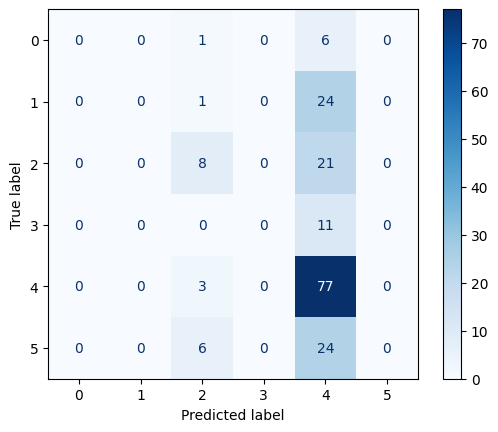

In [97]:
y_pred5 = clf5.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred5, cmap='Blues')
plt.show()

In [98]:
clf6 = LinearSVC()
clf6.fit(X_train,y_train)
display(clf6.score(X_train,y_train))
display(clf6.score(X_test,y_test))

0.5220588235294118

0.4340659340659341

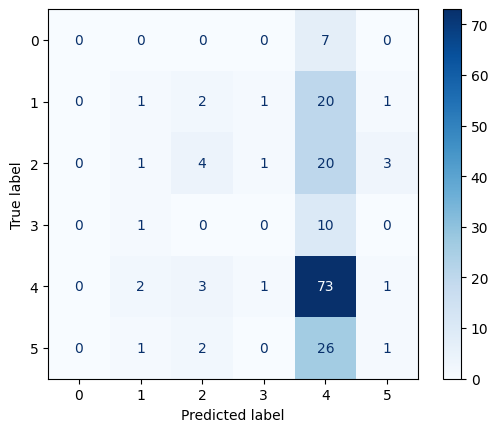

In [99]:
y_pred6 = clf6.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred6, cmap='Blues')
plt.show()

Now I'll change the data into 4 sets of 100 songs each (eliminates 2 genres)

In [100]:
# Generate a random array of numbers from 0 to 725 (randomly chooses our songs)
numbers = np.arange(0, 725)
np.random.shuffle(numbers)
print(numbers)

[709 113 557 336 649 359 222 271 452 520 346 476 119 405 229 717  36 496
 655   8 653 137 312 300 443 451 466 172  86 435 643 568 372 637 422 323
 591  89 445 335 370 195 563 619  20 471 552 432 708 200 127 499 690 674
 495 268 720 618 117 187 533 669 589 671 635 251 337 280 606 281 692 317
 349  29 183 388  61 140 420 358 602  37  71 616 234 580 531 259 693 408
 625  57 382  19 430 189 701 716 411 108 326 329 413 157 551 415 225 134
 350 407 116 514 314  50 703 213 439 663 658  81 218  38 102 722  48 135
 686 146 263  28  52 455 598 175 173 201 494 186 576 473  87 467  62 383
  44 318 700 193 611 481 122 483   7 695 341 714 593 390 642 299 474  72
 310 646 290 297 509 627 328 156 396 418 374 621 585 228 202 159 675 688
 469 431 706 607 550 457 560  34 553   1 373 296 442  74 132 245 433 357
 461 247 569 610 479 284 667 378 397 180 711 168 522 288 651 260 111  82
 577 301 414 123 549 437 419 112 683 114 707 647 529 164 215 544 497 129
 562 377 448 401 325 130 515 592 224 670  84  12 61

In [101]:
X_new = np.zeros((400,100))

ycodes_new_prior = np.zeros((400,1))

ycodes_new = ycodes_new_prior.flatten()
display(X_new.shape)
display(Xnorm.shape)

count1 = 0
count2 = 0
count3 = 0
count4 = 0
count_overall = 0

#World
for i in range(725):
    if ycodes[numbers[i]] == 5 and count1 < 100: #will get 100 World songs
      X_new[count_overall] = Xnorm[numbers[i]]
      ycodes_new[count_overall] = ycodes[numbers[i]]
      count1 += 1
      count_overall += 1
#classical
for j in range(725):
    if ycodes[numbers[j]] == 4 and count2 < 100:
        X_new[count_overall] = Xnorm[numbers[j]]
        ycodes_new[count_overall] = ycodes[numbers[j]]
        count2 += 1
        count_overall += 1
#electronic
for k in range(725):
    if ycodes[numbers[k]] == 2 and count3 < 100:
        X_new[count_overall] = Xnorm[numbers[k]]
        ycodes_new[count_overall] = ycodes[numbers[k]]
        count3 += 1
        count_overall += 1
#rock_pop
for l in range(725):
    if ycodes[numbers[l]] == 1 and count4 < 100:
        X_new[count_overall] = Xnorm[numbers[l]]
        ycodes_new[count_overall] = ycodes[numbers[l]]
        count4 += 1
        count_overall += 1


(400, 100)

(726, 100)

In [102]:
#New test train split will have 75 train and 25 test songs for each of 4 genres
X_train, X_test, y_train, y_test = train_test_split(X_new, ycodes_new, stratify=ycodes_new, random_state=0)

In [103]:
clf = neural_network.MLPClassifier(hidden_layer_sizes=(2,2,2),max_iter=10000, random_state=42)
clf.fit(X_train,y_train)
print(clf.score(X_train,y_train))
display(clf.score(X_test, y_test))

0.5366666666666666


0.27

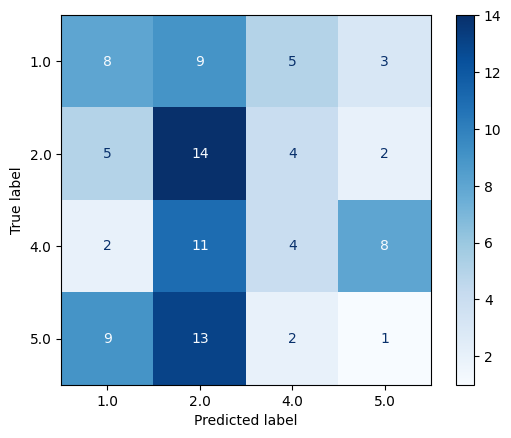

In [104]:
y_pred = clf.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.show()

In [105]:
clf2 = GaussianNB()
clf2.fit(X_train,y_train)
display(clf2.score(X_train,y_train))
display(clf2.score(X_test,y_test))

0.37

0.35

In [106]:
clf3 = LogisticRegressionCV(max_iter=10000)
clf3.fit(X_train,y_train)
display(clf3.score(X_train,y_train))
display(clf3.score(X_test,y_test))

0.38333333333333336

0.39

In [107]:
clf4 = LogisticRegressionCV(max_iter=10000,penalty='l1',solver='liblinear')
clf4.fit(X_train,y_train)
display(clf4.score(X_train,y_train))
display(clf4.score(X_test,y_test))

0.2633333333333333

0.27

In [108]:
clf5 = SVC()
clf5.fit(X_train,y_train)
display(clf5.score(X_train,y_train))
display(clf5.score(X_test,y_test))

0.5

0.4

In [109]:
clf6 = LinearSVC()
clf6.fit(X_train,y_train)
display(clf6.score(X_train,y_train))
display(clf6.score(X_test,y_test))

0.4533333333333333

0.37